In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, ttest_1samp, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Features:
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

#Inspecting data

In [2]:
jobs_df = pd.read_csv('/content/aug_train.csv')
pd.set_option('display.max_columns', None)

#Make some columns be categorical

In [3]:
jobs_df['target'] = pd.Categorical(jobs_df['target'], [0, 1], ordered=True)
jobs_df['education_level'].fillna('No education', inplace=True)
jobs_df['education_level'] = pd.Categorical(jobs_df['education_level'], ['No education', 'Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], ordered=True)
jobs_df['relevent_experience'] = pd.Categorical(jobs_df['relevent_experience'], ['No relevent experience', 'Has relevent experience'], ordered=True)
jobs_df['experience'].fillna('No experience', inplace=True)
jobs_df['experience'] = pd.Categorical(jobs_df['experience'],
                                       ['No experience', '<1', '1', '2', '3' , '4', '5', '6', '7', '8', '9', '10',
                                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'], ordered=True)

#Data description

In [4]:

print(jobs_df.head())
print(jobs_df.info())
print(len(jobs_df)) ## rows
jobs_desc = jobs_df.describe()
print(jobs_desc)

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

#Comparing educational level to relevent experience, education level, major discipline, company_size, company_type, target

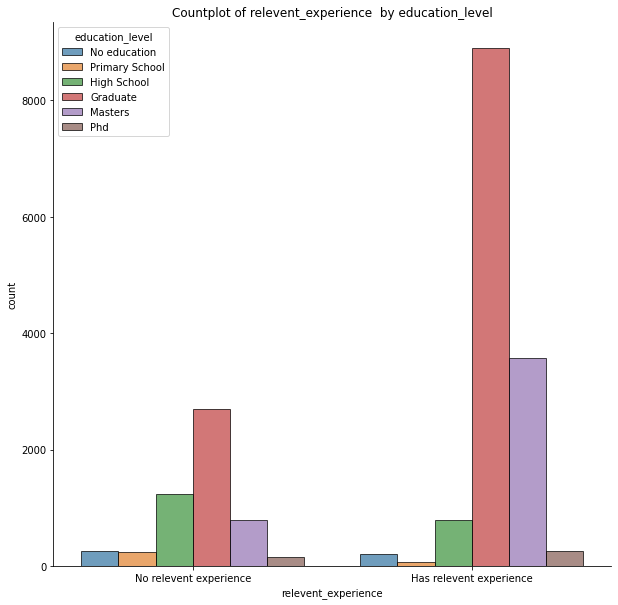

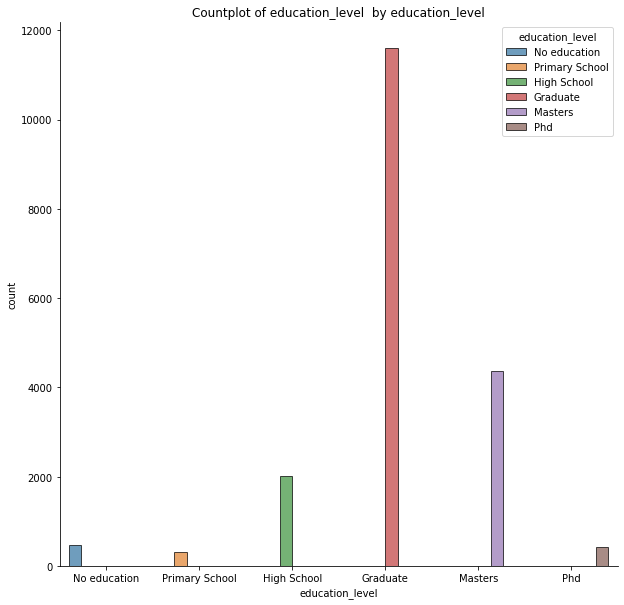

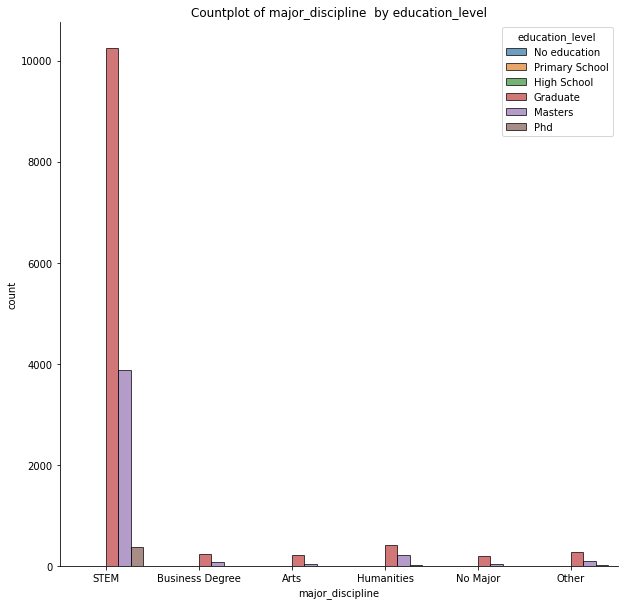

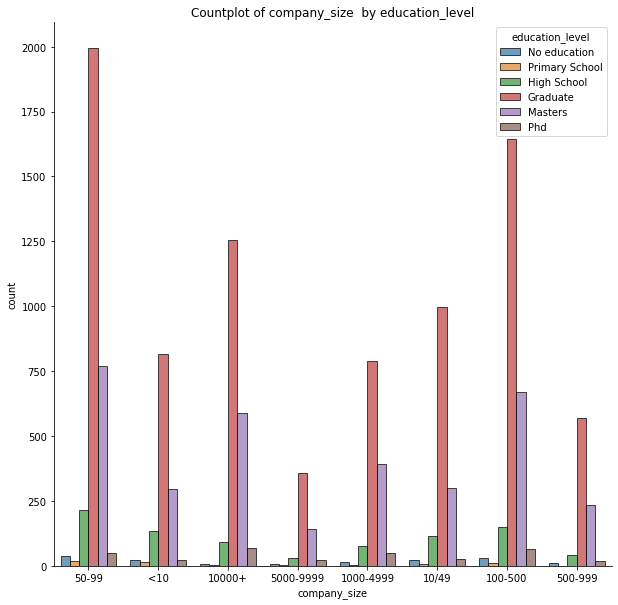

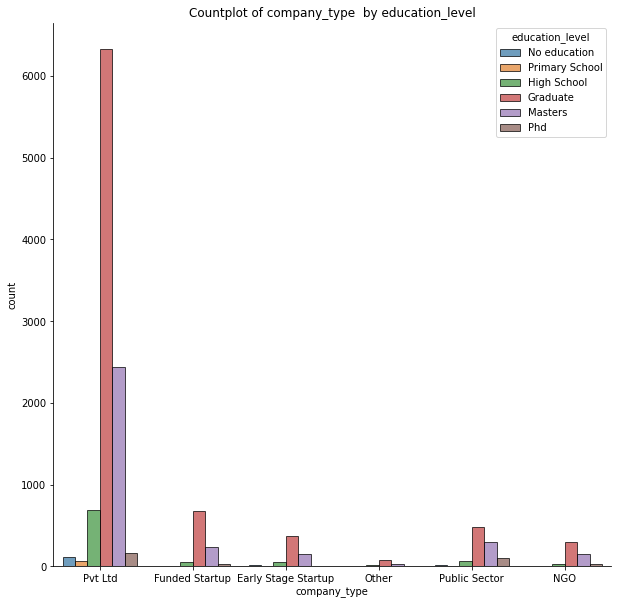

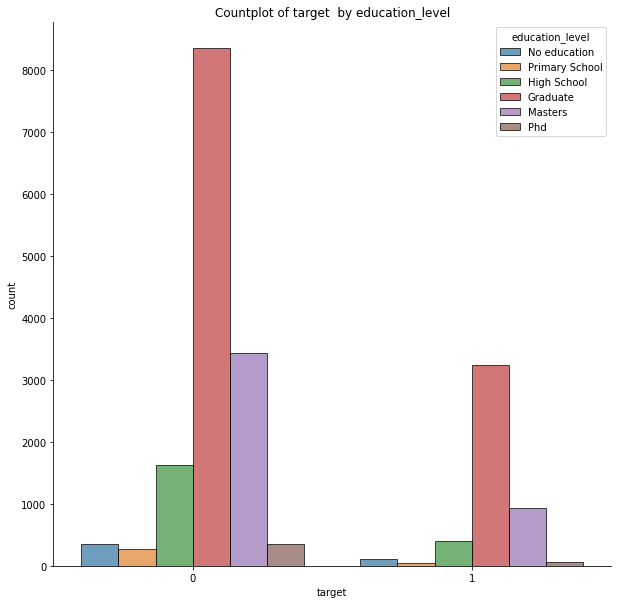

In [5]:
comparing_ed_level_with =["relevent_experience", "education_level","major_discipline", "company_size","company_type", "target"]
for i, comparison in enumerate(comparing_ed_level_with):
    plt.figure(figsize=[10, 10])
    sns.countplot(x=comparison, hue='education_level', edgecolor="black", alpha=0.7, data=jobs_df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(comparison))
    plt.show()

#Compare experience to education level

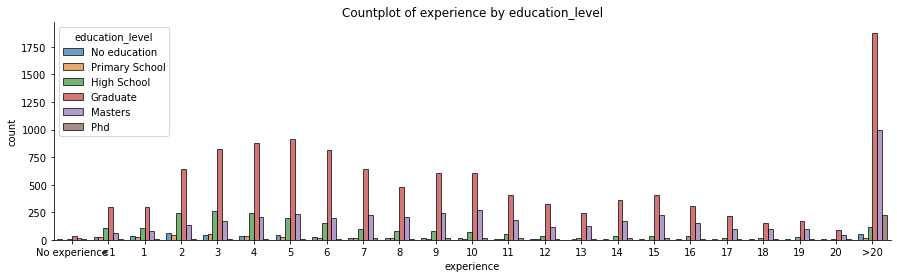

In [6]:
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=jobs_df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

#Compare training hours to education level

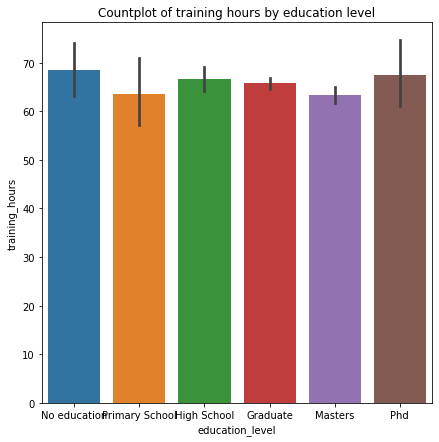

In [7]:
plt.figure(figsize=(7, 7))
sns.barplot(data=jobs_df, x='education_level', y='training_hours')
plt.title('Countplot of training hours by education level')
plt.show()


#Make copy of dataframe to calculate mean education level and relevent experience depending on education level

In [8]:
jobs_cp = jobs_df.copy()

#Get Unique tables
unique_rel_exp = jobs_cp['relevent_experience'].unique().sort_values()
unique_exp = jobs_cp['experience'].unique().sort_values()
print(unique_exp, unique_rel_exp)
#Make this categorical table numeric
jobs_cp['relevent_experience'] = jobs_cp['relevent_experience'].cat.codes
jobs_cp['experience'] = jobs_cp['experience'].cat.codes

['No experience', '<1', '1', '2', '3', ..., '17', '18', '19', '20', '>20']
Length: 23
Categories (23, object): ['No experience' < '<1' < '1' < '2' ... '18' < '19' < '20' < '>20'] ['No relevent experience', 'Has relevent experience']
Categories (2, object): ['No relevent experience' < 'Has relevent experience']


#Calculate mean

In [9]:
education_levels = ['High School', 'Graduate', 'Masters', 'Phd']
columns = ['experience', 'relevent_experience', 'training_hours']
for education_level in education_levels:
    print(f'VALUES FOR {education_level}')
    for column in columns:
        df = jobs_cp[jobs_cp['education_level'] == education_level]
        mean = round(np.mean(df[column]))
        median = round(np.median(df[column]))
        if column == 'experience':
            print(f'Mean value of {column} is {unique_exp[mean]} years')
            print(f'Median value of {column} is {unique_exp[median]} years')
        if column == 'relevent_experience':
            print(f'Mean value of {column} is {unique_rel_exp[mean]}')
            print(f'Median value of {column} is {unique_rel_exp[median]}')
        if column == 'training_hours':
            print(f'Mean value of {column} is {mean} hours')
            print(f'Median value of {column} is {median} hours')
    print('\n')

VALUES FOR High School
Mean value of experience is 6 years
Median value of experience is 5 years
Mean value of relevent_experience is No relevent experience
Median value of relevent_experience is No relevent experience
Mean value of training_hours is 67 hours
Median value of training_hours is 49 hours


VALUES FOR Graduate
Mean value of experience is 10 years
Median value of experience is 8 years
Mean value of relevent_experience is Has relevent experience
Median value of relevent_experience is Has relevent experience
Mean value of training_hours is 66 hours
Median value of training_hours is 47 hours


VALUES FOR Masters
Mean value of experience is 12 years
Median value of experience is 11 years
Mean value of relevent_experience is Has relevent experience
Median value of relevent_experience is Has relevent experience
Mean value of training_hours is 63 hours
Median value of training_hours is 46 hours


VALUES FOR Phd
Mean value of experience is 16 years
Median value of experience is >20

#Check association between education level and target

In [10]:
xtab = pd.crosstab(jobs_df['education_level'], jobs_df['target'])
chi2, pval, dof, exp = chi2_contingency(xtab)
print('''
H0 - there is a dependence between education level and the desire to find a job in the contingency table.
HA - there is no dependence between education level and the desire to find a job in the contingency table.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between education level and the desire to find a job in the contingency table.
HA - there is no dependence between education level and the desire to find a job in the contingency table.

2.787356885121268e-34
Reject H0


#Check association between education level and city

In [11]:
xtab = pd.crosstab(jobs_df['education_level'], jobs_df['city'])
chi2, pval, dof, exp = chi2_contingency(xtab)
print('''
H0 - there is a dependence between education level and city in the contingency table.
HA - there is no dependence between education level and city in the contingency table.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between education level and city in the contingency table.
HA - there is no dependence between education level and city in the contingency table.

0.0
Reject H0


#Check association between desure to find a job and city

In [12]:
xtab = pd.crosstab(jobs_df['target'], jobs_df['city'])
chi2, pval, dof, exp = chi2_contingency(xtab)
print('''
H0 - there is a dependence between desire to find a job and city in the contingency table.
HA - there is no dependence between desire to find a job and city in the contingency table.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between desire to find a job and city in the contingency table.
HA - there is no dependence between desire to find a job and city in the contingency table.

0.0
Reject H0


#Check association between gender and target

In [13]:
xtab = pd.crosstab(jobs_df['gender'], jobs_df['target'])
chi2, pval, dof, exp = chi2_contingency(xtab)
print('''
H0 - there is a dependence between gender and the desire to find a job in the contingency table.
HA - there is no dependence between gender and the desire to find a job in the contingency table.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between gender and the desire to find a job in the contingency table.
HA - there is no dependence between gender and the desire to find a job in the contingency table.

0.010877151633874342
Reject H0


#Testing association between gender and training hours

In [14]:
man_training = jobs_df[jobs_df['gender'] == 'Male']['training_hours']
woman_training = jobs_df[jobs_df['gender'] == 'Female']['training_hours']
tstat, pval = ttest_ind(man_training, woman_training)
print('''
H0 - there is a dependence between gender and training hours.
HA - there is no dependence between gender and training hours.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between gender and training hours.
HA - there is no dependence between gender and training hours.

0.8490947996787109
Accept H0


#Testing association between education level and training hours

In [15]:
grad_training = jobs_df[jobs_df['education_level'] == 'Graduate']['training_hours']
masters_training = jobs_df[jobs_df['education_level'] == 'Masters']['training_hours']
phd_training = jobs_df[jobs_df['education_level'] == 'Phd']['training_hours']
high_school_training = jobs_df[jobs_df['education_level'] == 'High School']['training_hours']
tstat, pval = f_oneway(grad_training, masters_training, phd_training, high_school_training)
print('''
H0 - there is a dependence between educational level and training hours.
HA - there is no dependence between educational level and training hours.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between educational level and training hours.
HA - there is no dependence between educational level and training hours.

0.061296274745122614
Accept H0


#There is a dependence between education level and training hours so we need to check where

In [16]:
print(jobs_df['education_level'].unique())
tukey_results = pairwise_tukeyhsd(jobs_df['training_hours'].astype('float'), jobs_df['education_level'], 0.05)
print(tukey_results)


['Graduate', 'Masters', 'High School', 'No education', 'Phd', 'Primary School']
Categories (6, object): ['No education' < 'Primary School' < 'High School' < 'Graduate' < 'Masters' < 'Phd']
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
    Graduate    High School   0.9073    0.9  -3.2216  5.0362  False
    Graduate        Masters  -2.5026 0.1756  -5.5427  0.5375  False
    Graduate   No education   2.6788    0.9  -5.4577 10.8152  False
    Graduate            Phd   1.7507    0.9  -6.8095  10.311  False
    Graduate Primary School  -2.1468    0.9 -12.0274  7.7339  False
 High School        Masters  -3.4099 0.2827  -8.0185  1.1987  False
 High School   No education   1.7715    0.9  -7.0716 10.6145  False
 High School            Phd   0.8434    0.9   -8.391 10.0778  False
 High School Primary School  -3.0541    0.9 -13.5242  7.4161  F

#We have high dependence between education level and training hours